# Clean and Analyse Employee Exit Surveys

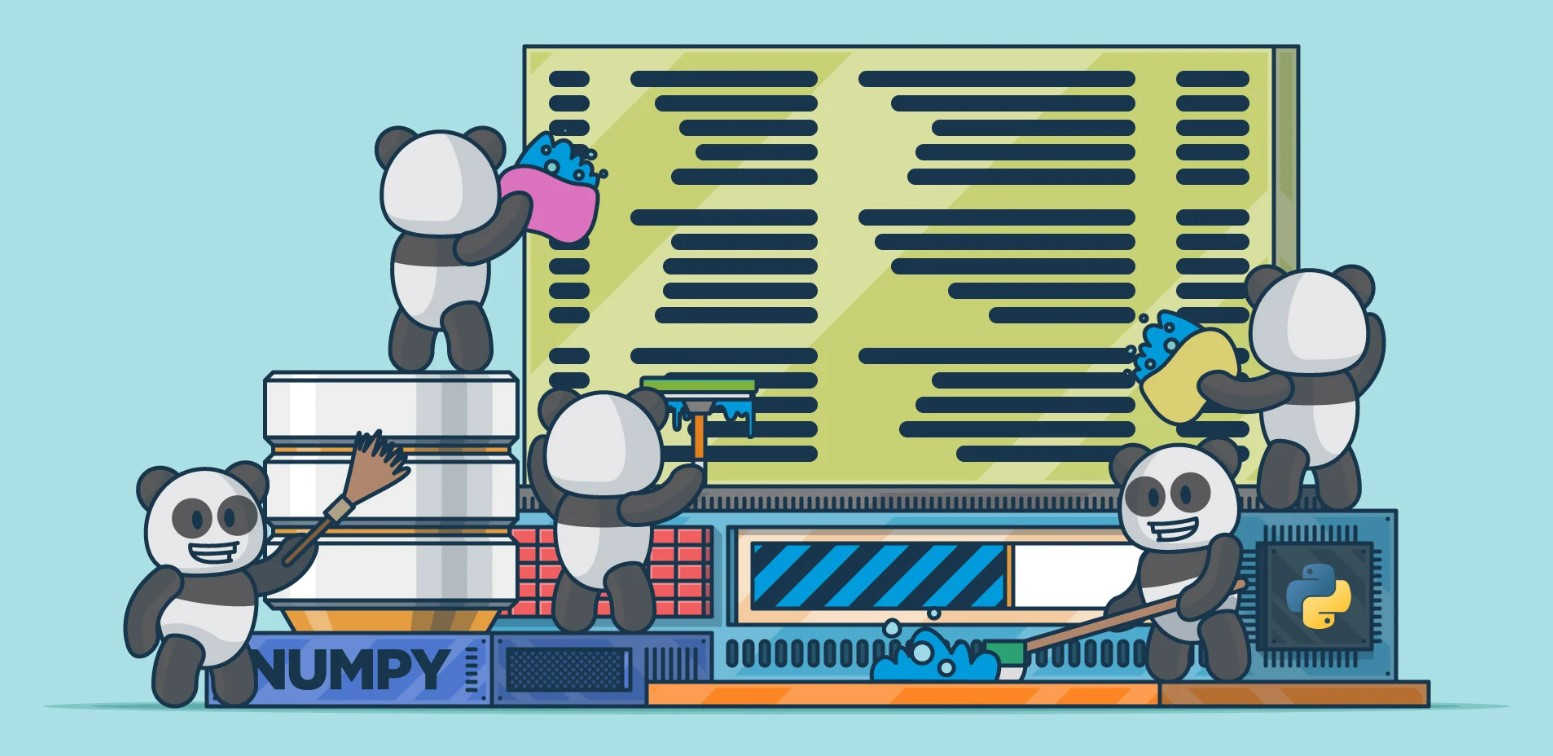

## Introduction

This project is aimed at applying data cleaning skills to practice.
We will work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the DETE exit survey data __[here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)__. 
Based on these surveys we should attempt to answer the following questions:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We need to combine the results from both surveys to answer these questions. Although both used the same survey template, some of the answers in one survey have been customized. Before we can answer the first question we need to clean and bring the data from both surveys to the same shape.

## Cleaning and Analysing Data

### 1.  Reading the datasets into pandas and exploring them


In [1]:
import pandas as pd
import numpy as np

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [4]:
pd.set_option('display.max_columns', None) # sets the value to display maximum columns
dete_survey.head(10)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994,1997,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,SD,SD,SD,D,SD,D,D,A,NaN,SA,A,A,N,N,D,A,D,D,D,D,NaN,Female,41-45,NaN,NaN,NaN,NaN,NaN
6,7,Age Retirement,05/2012,1972,2007,Teacher,Secondary,Darling Downs South West,NaN,Permanent Part-time,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,SD,N,SD,D,A,A,D,D,SA,D,N,N,D,D,N,N,D,D,D,D,SD,Female,56-60,NaN,NaN,NaN,NaN,NaN
7,8,Age Retirement,05/2012,1988,1990,Teacher Aide,NaN,North Coast,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,NaN,A,A,SA,SA,SA,SA,A,SA,SA,A,NaN,A,N,A,SA,A,SA,NaN,SA,Female,61 or older,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009,2009,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,D,N,D,D,N,SD,SD,D,D,N,A,NaN,SD,SD,N,D,SD,D,A,D,N,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997,2008,Teacher Aide,NaN,Not Stated,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,SD,SD,SD,SD,A,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,Female,46-50,NaN,NaN,NaN,NaN,NaN


In [5]:
dete_survey.tail(10)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
812,814,Age Retirement,01/2014,1998,2005,Teacher,Secondary,Not Stated,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,A,A,A,A,SA,A,A,A,A,A,A,A,A,A,A,N,SA,Male,61 or older,NaN,NaN,NaN,NaN,NaN
813,815,Age Retirement,11/2013,1995,2007,Public Servant,AO5-AO7,North Coast,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,NaN,A,D,N,A,A,A,A,SA,SA,A,D,D,D,A,A,A,A,D,D,A,Female,56-60,NaN,NaN,NaN,NaN,NaN
814,816,Age Retirement,11/2013,Not Stated,Not Stated,Cleaner,NaN,Not Stated,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,SA,NaN,SA,SA,SA,SA,SA,SA,SA,SA,SA,SA,NaN,NaN,NaN,SA,SA,SA,SA,SA,SA,Female,61 or older,NaN,NaN,NaN,NaN,NaN
815,817,Resignation-Other employer,01/2014,2012,2012,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,A,A,A,A,A,A,A,A,A,N,SA,SA,SA,A,SA,SA,SA,SA,SA,Male,21-25,NaN,NaN,NaN,NaN,NaN
816,818,Resignation-Move overseas/interstate,01/2014,2012,2012,Teacher,Secondary,North Coast,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,SA,SA,A,A,SA,SA,N,N,A,A,A,A,A,N,N,N,A,N,A,N,A,Female,21-25,NaN,NaN,NaN,NaN,NaN
817,819,Age Retirement,02/2014,1977,1999,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,SA,N,D,D,A,N,N,D,A,N,A,A,N,SA,SA,N,D,A,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980,1980,Teacher,Secondary,North Coast,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,A,SA,D,D,D,A,A,N,A,N,A,A,N,A,N,N,A,A,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009,2009,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,A,A,A,A,A,D,N,A,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001,2009,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,A,D,D,A,SD,SD,SD,A,D,SD,SD,D,A,A,N,N,N,SD,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN
821,823,Resignation-Move overseas/interstate,12/2013,Not Stated,Not Stated,Teacher Aide,NaN,Metropolitan,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [7]:
tafe_survey.head(10)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

### 2. Identifying Missing Values and Dropping Unnecessary Columns

In [8]:
dete_survey['Region'].value_counts(dropna = False)

Metropolitan                135
Central Office              130
South East                  108
Not Stated                  105
Darling Downs South West     95
Central Queensland           84
North Coast                  75
North Queensland             53
Far North Queensland         37
Name: Region, dtype: int64

dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN. We should use pd.read_csv() function to include 'Not Stated' as NaN.

In [9]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

In [10]:
# confirmimg our results
dete_survey['Region'].value_counts(dropna = False)

Metropolitan                135
Central Office              130
South East                  108
NaN                         105
Darling Downs South West     95
Central Queensland           84
North Coast                  75
North Queensland             53
Far North Queensland         37
Name: Region, dtype: int64

In [11]:
dete_survey.columns.tolist()

['ID',
 'SeparationType',
 'Cease Date',
 'DETE Start Date',
 'Role Start Date',
 'Position',
 'Classification',
 'Region',
 'Business Unit',
 'Employment Status',
 'Career move to public sector',
 'Career move to private sector',
 'Interpersonal conflicts',
 'Job dissatisfaction',
 'Dissatisfaction with the department',
 'Physical work environment',
 'Lack of recognition',
 'Lack of job security',
 'Work location',
 'Employment conditions',
 'Maternity/family',
 'Relocation',
 'Study/Travel',
 'Ill Health',
 'Traumatic incident',
 'Work life balance',
 'Workload',
 'None of the above',
 'Professional Development',
 'Opportunities for promotion',
 'Staff morale',
 'Workplace issue',
 'Physical environment',
 'Worklife balance',
 'Stress and pressure support',
 'Performance of supervisor',
 'Peer support',
 'Initiative',
 'Skills',
 'Coach',
 'Career Aspirations',
 'Feedback',
 'Further PD',
 'Communication',
 'My say',
 'Information',
 'Kept informed',
 'Wellness programs',
 'Health & 

In [12]:
tafe_survey.columns.tolist()

['Record ID',
 'Institute',
 'WorkArea',
 'CESSATION YEAR',
 'Reason for ceasing employment',
 'Contributing Factors. Career Move - Public Sector ',
 'Contributing Factors. Career Move - Private Sector ',
 'Contributing Factors. Career Move - Self-employment',
 'Contributing Factors. Ill Health',
 'Contributing Factors. Maternity/Family',
 'Contributing Factors. Dissatisfaction',
 'Contributing Factors. Job Dissatisfaction',
 'Contributing Factors. Interpersonal Conflict',
 'Contributing Factors. Study',
 'Contributing Factors. Travel',
 'Contributing Factors. Other',
 'Contributing Factors. NONE',
 'Main Factor. Which of these was the main factor for leaving?',
 'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
 'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
 'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
 'InstituteViews. Topic:4. I was given adequate opport

Both  dataframes contain many columns which are not required for our analysis. Removing those will improve readability of the dataframes.

In [13]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

In [14]:
# confirming results
tafe_survey_updated.columns.tolist()

['Record ID',
 'Institute',
 'WorkArea',
 'CESSATION YEAR',
 'Reason for ceasing employment',
 'Contributing Factors. Career Move - Public Sector ',
 'Contributing Factors. Career Move - Private Sector ',
 'Contributing Factors. Career Move - Self-employment',
 'Contributing Factors. Ill Health',
 'Contributing Factors. Maternity/Family',
 'Contributing Factors. Dissatisfaction',
 'Contributing Factors. Job Dissatisfaction',
 'Contributing Factors. Interpersonal Conflict',
 'Contributing Factors. Study',
 'Contributing Factors. Travel',
 'Contributing Factors. Other',
 'Contributing Factors. NONE',
 'Gender. What is your Gender?',
 'CurrentAge. Current Age',
 'Employment Type. Employment Type',
 'Classification. Classification',
 'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
 'LengthofServiceCurrent. Length of Service at current workplace (in years)']

In [15]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)

In [16]:
# confirming results once again
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

### 3. Cleaning Column Names

Each dataframe contains several columns with the same meaning, but different column names Below are some examples of the above mentioned columns:

- ‘ID’ and ‘Record ID’ 
- ‘SeparationType’ and ‘Reason for ceasing employment’
- ‘Cease Date’ and ‘CESSATION YEAR’
- ‘Age’ and ‘CurrentAge. Current Age’
- ‘Gender’ and ‘Gender. What is your Gender?’

Before we combine these columns, we need to standardize the column names.

In [17]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace('\s+', '_').str.strip().str.lower()

In [18]:
# confirmimg results
dete_survey_updated.columns.tolist()

['id',
 'separationtype',
 'cease_date',
 'dete_start_date',
 'role_start_date',
 'position',
 'classification',
 'region',
 'business_unit',
 'employment_status',
 'career_move_to_public_sector',
 'career_move_to_private_sector',
 'interpersonal_conflicts',
 'job_dissatisfaction',
 'dissatisfaction_with_the_department',
 'physical_work_environment',
 'lack_of_recognition',
 'lack_of_job_security',
 'work_location',
 'employment_conditions',
 'maternity/family',
 'relocation',
 'study/travel',
 'ill_health',
 'traumatic_incident',
 'work_life_balance',
 'workload',
 'none_of_the_above',
 'gender',
 'age',
 'aboriginal',
 'torres_strait',
 'south_sea',
 'disability',
 'nesb']

In [19]:
columns_rename = {'Record ID': 'id',
                  'CESSATION YEAR': 'cease_date',
                  'Reason for ceasing employment': 'separationtype',
                  'Gender. What is your Gender?': 'gender',
                  'CurrentAge. Current Age': 'age', 
                  'Employment Type. Employment Type': 'employment_status',
                  'Classification. Classification': 'position', 
                  'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                  'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated = tafe_survey_updated.rename(mapper = columns_rename, axis = 1)


In [20]:
# reviewing results of our changes
tafe_survey_updated.columns.tolist()

['id',
 'Institute',
 'WorkArea',
 'cease_date',
 'separationtype',
 'Contributing Factors. Career Move - Public Sector ',
 'Contributing Factors. Career Move - Private Sector ',
 'Contributing Factors. Career Move - Self-employment',
 'Contributing Factors. Ill Health',
 'Contributing Factors. Maternity/Family',
 'Contributing Factors. Dissatisfaction',
 'Contributing Factors. Job Dissatisfaction',
 'Contributing Factors. Interpersonal Conflict',
 'Contributing Factors. Study',
 'Contributing Factors. Travel',
 'Contributing Factors. Other',
 'Contributing Factors. NONE',
 'gender',
 'age',
 'employment_status',
 'position',
 'institute_service',
 'role_service']

### 4. Filtering Data

Now we will remove more of the data we don't need. 

In [21]:
# reviewing unique values
tafe_survey_updated['separationtype'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [22]:
dete_survey_updated['separationtype'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

If we look at the unique values in the ‘separationtype’ columns in each dataframe, we'll see that both contain a few different separation types. For this project, we'll only analyse survey respondents who resigned, so their separation type contains the string 'Resignation'.

In [23]:
# selecting only the data for survey respondents who have a 'Resignation' separation type
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

In [24]:
# reviewing results
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

In [25]:
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

In [26]:
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [27]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()

In [28]:
dete_resignations['separationtype'].value_counts()

Resignation    311
Name: separationtype, dtype: int64

### 5. Verifying the Data

Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies.

We will attempt to verify that the years in the ‘cease_date’ and ‘dete_start_date’ columns make sense and will also bring them to the same standard.


In [29]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
07/2012      1
2010         1
09/2010      1
Name: cease_date, dtype: int64

In [30]:
# extracting the years from months
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float') # converting results to float

# verifying results
dete_resignations['cease_date'].value_counts() 

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [31]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [32]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

### 6. Creating New Columns
‘tafe_resignations’ dataframe already contains a ‘institute_service’ column, which provides the length of time an employee spent at workplace.  In order to analyze both surveys together, we'll have to create a corresponding ‘institute_service’ column in ‘dete_resignations’ dataframe.

In [33]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [34]:
dete_resignations.head() # verifying our results

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


### 7. Identifying Dissatisfied Employees

One of the questions we are trying to answer is: ‘Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?’ As the result we need to identify any employees who resigned because of their dissatisfaction. Below are the columns we will use to categorize employees as "dissatisfied" from each dataframe. Those below, in our opinion, reflect most with identifying the term ‘dissatisfied’.

‘dete_survey_updated’: 

* ‘job_dissatisfaction’, 
* ‘dissatisfaction_with_the_department’,
* ‘physical_work_environment’,
* ‘lack_of_recognition’,
* ‘lack_of_job_security’,
* ‘work_location’,
* ‘employment_conditions’,
* ‘work_life_balance’,
* ‘workload’

‘tafe_survey_updated’:

* ‘Contributing Factors. Dissatisfaction’,
* ‘Contributing Factors. Job Dissatisfaction’

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.
After our changes, the new dissatisfied column will contain just the following values:

* True: indicates a person resigned because they were dissatisfied with the job
* False: indicates a person resigned because of a reason other than dissatisfaction with the job
* NaN: indicates the value is missing


In [35]:
# identifying values in dataframe
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna = False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [36]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna = False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [37]:
# creating function to replace responses to 'True', 'False' or 'NaN'
def update_vals(value):
    if value == '-':
        return False
    elif pd.isnull(value): # handling missing values separately
        return np.nan
    else:
        return True
    
# If any of the columns listed above contain 'True' value, 
# we'll add 'True' value to a new column named 'dissatisfied' using DataFrame.any() method   
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Job Dissatisfaction', 
                                                       'Contributing Factors. Dissatisfaction'
                                                      ]].applymap(update_vals).any(axis=1, skipna=False)

In [38]:
# creating a copy of the results and avoid the ‘SettingWithCopyWarning’
tafe_resignations_up = tafe_resignations.copy()

In [39]:
# verifying results
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [40]:
# applying the same as above logic to ‘dete_resignations’
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 
                                                       'dissatisfaction_with_the_department',
                                                       'physical_work_environment',
                                                       'lack_of_recognition',
                                                       'lack_of_job_security',
                                                       'work_location',
                                                       'employment_conditions',
                                                       'work_life_balance',
                                                       'workload']].any(axis=1, skipna=False)

In [41]:
dete_resignations_up = dete_resignations.copy()

In [42]:
dete_resignations_up['dissatisfied'].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

### 8. Combining the Data
Our aim is to aggregate data from both dataframes.

In [43]:
# adding new column to each frame in order to distinguish between the two.
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [44]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up], ignore_index = True)

In [45]:
# verifying results
combined['institute'].value_counts(dropna=False)

TAFE    340
DETE    311
Name: institute, dtype: int64

In [46]:
# inspecting new dataframe
combined.notnull().sum().sort_values(ascending=False)

id                                                     651
institute                                              651
separationtype                                         651
dissatisfied                                           643
cease_date                                             635
position                                               598
employment_status                                      597
age                                                    596
gender                                                 592
institute_service                                      563
WorkArea                                               340
Institute                                              340
Contributing Factors. Study                            332
Contributing Factors. NONE                             332
Contributing Factors. Interpersonal Conflict           332
Contributing Factors. Other                            332
Contributing Factors. Dissatisfaction                  3

There is still lots of information irrelevant for our analysis. We should remove it to simplify our process. We will drop any columns with less than 500 non null values.

In [47]:
# using copy() to prevent SettingwithCopyWarning
combined_updated = combined.dropna(axis = 1, thresh = 500).copy()

In [48]:
# verifying results
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(2), object(8)
memory usage: 51.0+ KB


### 9. Cleaning the Service Column
We now have to clean up the ‘institute_service’ column before progressing any  further. 

To analyse the data it would make sense to convert these numbers into four categories below:
* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company


In [49]:
# inspecting the column's values
combined_updated['institute_service'].value_counts(dropna = False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
14.0                   6
10.0                   6
12.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
19.0                   3
39.0                   3
21.0                   3
32.0                   3
25.0                   2
26.0                   2
36.0                   2
28.0                   2
30.0                   2


This column contains values in a couple different forms. First we need to extract the years of service from each value in the ‘institute_service’ column. Next, we will map each value to one of the career stage definitions. 

In [50]:
# extracting the years of service and converting to float type
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

In [51]:
# verifying results
combined_updated['institute_service_up'].value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [52]:
# mapping each value to one of the career stage definitions
def map_val(val):
    if val <= 3:
        return 'New, 0-3 yrs'
    elif 3 <= val <= 6:
        return 'Experienced, 3-6 yrs'
    elif 7 <= val <= 10:
        return 'Established, 7-10 yrs'
    elif pd.isnull(val): # handling missing values separately
        return np.nan
    else:
        return 'Veteran, 11+ yrs'
    
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(map_val)

In [53]:
# inspecting results
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,institute_service_up,service_cat
0,4.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE,7.0,"Established, 7-10 yrs"
1,6.0,Resignation,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE,18.0,"Veteran, 11+ yrs"
2,9.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE,3.0,"New, 0-3 yrs"
3,10.0,Resignation,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE,15.0,"Veteran, 11+ yrs"
4,12.0,Resignation,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE,3.0,"New, 0-3 yrs"


### 10. Performing Initial Analysis

We will attempt to answer the first part of the questions:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

In [54]:
# inspecting values in 'dissatisfied' column
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

We will use df.pivot_table() method in order to perform the analysis. This method treats Boolean values as integers, so a True value is considered to be 1 and a False value is considered to be 0. Therefore removing missing values before aggregating the data is required.

In [55]:
# replacing the missing values with the value that occurs most frequently in this column – in our case it is False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [56]:
# verifying results
combined_updated['dissatisfied'].value_counts(dropna = False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [57]:
# default aggregation function in pivotablet_table() is the mean, which is what required for our purpose
table = combined_updated.pivot_table(index = 'service_cat', values = 'dissatisfied').applymap(lambda x:100 * x).round(2)
table_sorted = table.sort_values(by = ['dissatisfied'], ascending = False)

# displaying the table figures in % 
table_to_display = combined_updated.pivot_table(index = 'service_cat', values = 'dissatisfied').applymap(
    lambda x: "{:.0f}%".format(100*x)).sort_values(by = ['dissatisfied'], ascending = False)
table_to_display.head()

,dissatisfied
service_cat,
"Established, 7-10 yrs",52%
"Veteran, 11+ yrs",49%
"Experienced, 3-6 yrs",40%
"New, 0-3 yrs",29%


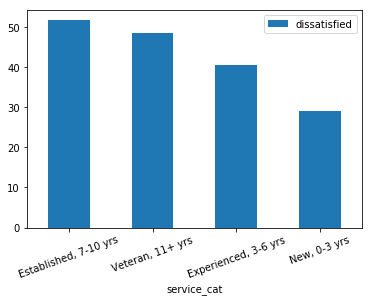

In [58]:
# plotting the results
%matplotlib inline
table_sorted.plot(kind = 'bar', rot = 20)

Based on the results above, we established that employees who worked for their institutes for a longer period of time are actually more likely to resign due some kind of dissatisfaction, especially comparing to newer employees. Established workers (7-10 years of service) are almost twice as likely to resign comparing with newbies (0-3 years).  

### 11. Cleaning the Age Column

Now we will attempt to answer the second part of the questions: 
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Beforehand, we need to work on and clean up 'age' column. We will apply the similar technic to the one we applied on ‘service’ column. 

In [59]:
# inspecting the column's values
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
26  30           32
31  35           32
31-35            29
21-25            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [60]:
# extracting the age figures and converting to float type
combined_updated['age_up'] = combined_updated['age'].astype('str').str.extract(r'(\d+)')
combined_updated['age_up'] = combined_updated['age_up'].astype('float')

# verifying results
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,institute_service_up,service_cat,age_up
0,4.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE,7.0,"Established, 7-10 yrs",36.0
1,6.0,Resignation,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE,18.0,"Veteran, 11+ yrs",41.0
2,9.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE,3.0,"New, 0-3 yrs",31.0
3,10.0,Resignation,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE,15.0,"Veteran, 11+ yrs",46.0
4,12.0,Resignation,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE,3.0,"New, 0-3 yrs",31.0


In [61]:
# inspecting values
combined_updated['age_up'].value_counts(dropna = False).sort_index(ascending=False)

61.0    23
56.0    55
51.0    71
46.0    81
41.0    93
36.0    73
31.0    61
26.0    67
21.0    62
20.0    10
NaN     55
Name: age_up, dtype: int64

Similar to what we did with years of service categories, we should now create age categories. Splitting into decades categories intuitively seems like a logical approach.  We will make four categories:
* 20-29 years old
* 30-39 years old
* 40-49 years old
* 50+ years old


In [62]:
# mapping each age to appropriate category
def map_age(age):
    if age < 30:
        return '20-29 yo'
    elif 30 <= age < 40:
        return '30-39 yo'
    elif 40 <= age < 50:
        return '40-49 yo'
    elif pd.isnull(age): # handling missing values separately
        return np.nan
    else:
        return '50+ yo'
    
combined_updated['age_cat'] = combined_updated['age_up'].apply(map_age)

# inspecting results
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,institute_service_up,service_cat,age_up,age_cat
0,4.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE,7.0,"Established, 7-10 yrs",36.0,30-39 yo
1,6.0,Resignation,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE,18.0,"Veteran, 11+ yrs",41.0,40-49 yo
2,9.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE,3.0,"New, 0-3 yrs",31.0,30-39 yo
3,10.0,Resignation,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE,15.0,"Veteran, 11+ yrs",46.0,40-49 yo
4,12.0,Resignation,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE,3.0,"New, 0-3 yrs",31.0,30-39 yo


In [63]:
# inspecting values
combined_updated['age_cat'].value_counts(dropna = False).sort_index(ascending=True)

20-29 yo    139
30-39 yo    134
40-49 yo    174
50+ yo      149
NaN          55
Name: age_cat, dtype: int64

In [64]:
combined_updated['age_cat'].value_counts(dropna=False).sum()

651

Approximately 8% of the values in age column are missing. We will remove those before continuing with the analysis.  

In [65]:
combined_updated.drop(combined_updated[(combined_updated['age_cat'].isnull())].index, inplace=True)

In [66]:
# verifying results
combined_updated['age_cat'].value_counts(dropna = False).sort_index(ascending=False)

50+ yo      149
40-49 yo    174
30-39 yo    134
20-29 yo    139
Name: age_cat, dtype: int64

In [67]:
combined_updated['age_up'].value_counts(dropna=False).sum()

596

In [68]:
# creating the pivot table for age categories
age_table = combined_updated.pivot_table(index = 'age_cat', values = 'dissatisfied').applymap(
    lambda x:100 * x).round(2).sort_values(by = ['dissatisfied'], ascending = False)


# displaying the table figures in % 
age_table_to_display = combined_updated.pivot_table(index = 'age_cat', values = 'dissatisfied').applymap(
    lambda x: "{:.0f}%".format(100*x)).sort_values(by = ['dissatisfied'], ascending = False)
age_table_to_display.head()

,dissatisfied
age_cat,
50+ yo,42%
40-49 yo,38%
30-39 yo,36%
20-29 yo,35%


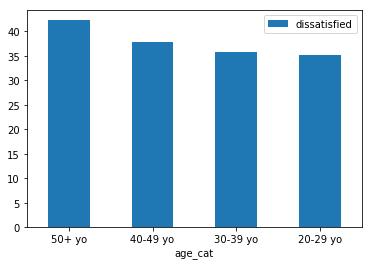

In [69]:
%matplotlib inline
age_table.plot(kind = 'bar', rot = 0)

Based on the results above we can see that the chances of resigning due to some kind of dissatisfaction are higher within the higher age category, although not significantly unlike with years of service case. Further analysis might potentially be needed in order to establish any trends or dependencies. 

## Conclusion 

We have managed to answer the questions raised at the beginning of this project, ie
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

There are clearly higher chances of employees who worked longer to resign due to some kind of dissatisfaction, although in case of age categorisation the tendencies are less obvious. Further analysis may be needed to establish those. 

We have completed the following tasks:
* Exploring the data and figuring out the path on how to prepare it for analysis
* Correcting missing values
* Dropping any data which is not required for the analysis
* Creating new columns
* Renaming and cleaning existing columns
* Combining data
* Aggregating data
* Verifying the quality of our data

This project was mainly intended to practice cleaning the data. We established that in order to extract any meaningful insights from our data, we had to perform many data cleaning tasks. 